<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ADF-for-stationary-TS-with-µ=0" data-toc-modified-id="ADF-for-stationary-TS-with-µ=0-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ADF for stationary TS with µ=0</a></span></li><li><span><a href="#ADF-for-stationary-TS-with-µ=const" data-toc-modified-id="ADF-for-stationary-TS-with-µ=const-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ADF for stationary TS with µ=const</a></span></li><li><span><a href="#ADF-for-TS-with-constant-and-time-trend" data-toc-modified-id="ADF-for-TS-with-constant-and-time-trend-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ADF for TS with constant and time trend</a></span></li><li><span><a href="#Comparison" data-toc-modified-id="Comparison-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparison</a></span><ul class="toc-item"><li><span><a href="#Statsmodels" data-toc-modified-id="Statsmodels-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Statsmodels</a></span></li><li><span><a href="#Arch" data-toc-modified-id="Arch-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Arch</a></span></li></ul></li><li><span><a href="#Log-transform" data-toc-modified-id="Log-transform-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Log-transform</a></span></li></ul></div>

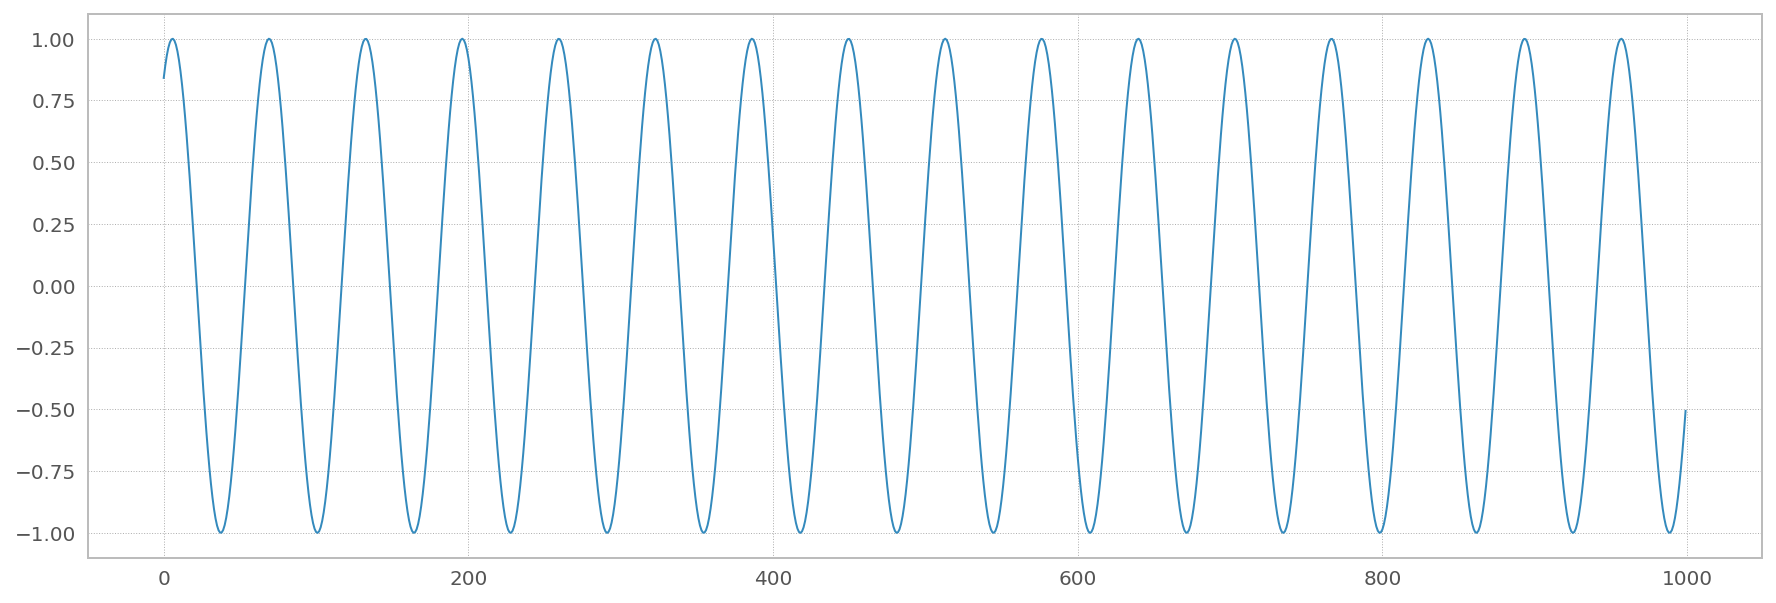

In [1]:
plt.rcParams["figure.figsize"] = (15, 5)
x = np.linspace(1, 100, 1000)
y = np.sin(x)
plt.plot(y);

# ADF for stationary TS with µ=0

In [2]:
from statsmodels.tsa.stattools import adfuller
adfuller(y, regression = 'nc', maxlag=3)

(-37130618559296.71,
 0.0,
 1,
 998,
 {'1%': -2.5679839221127625,
  '5%': -1.9412724853659513,
  '10%': -1.6165565671073312},
 -62426.990440209906)

# ADF for stationary TS with µ=const

In [3]:
adfuller(y+1, regression = 'nc')

(-0.20982925820149434,
 0.6102624064510732,
 2,
 997,
 {'1%': -2.5679861764430703,
  '5%': -1.9412727620001924,
  '10%': -1.6165563055663268},
 -59876.373189152626)

In [4]:
adfuller(y+1, regression = 'c')

(-37139571439041.36,
 0.0,
 1,
 998,
 {'1%': -3.4369193380671, '5%': -2.864440383452517, '10%': -2.56831430323573},
 -61216.957365740884)

# ADF for TS with constant and time trend

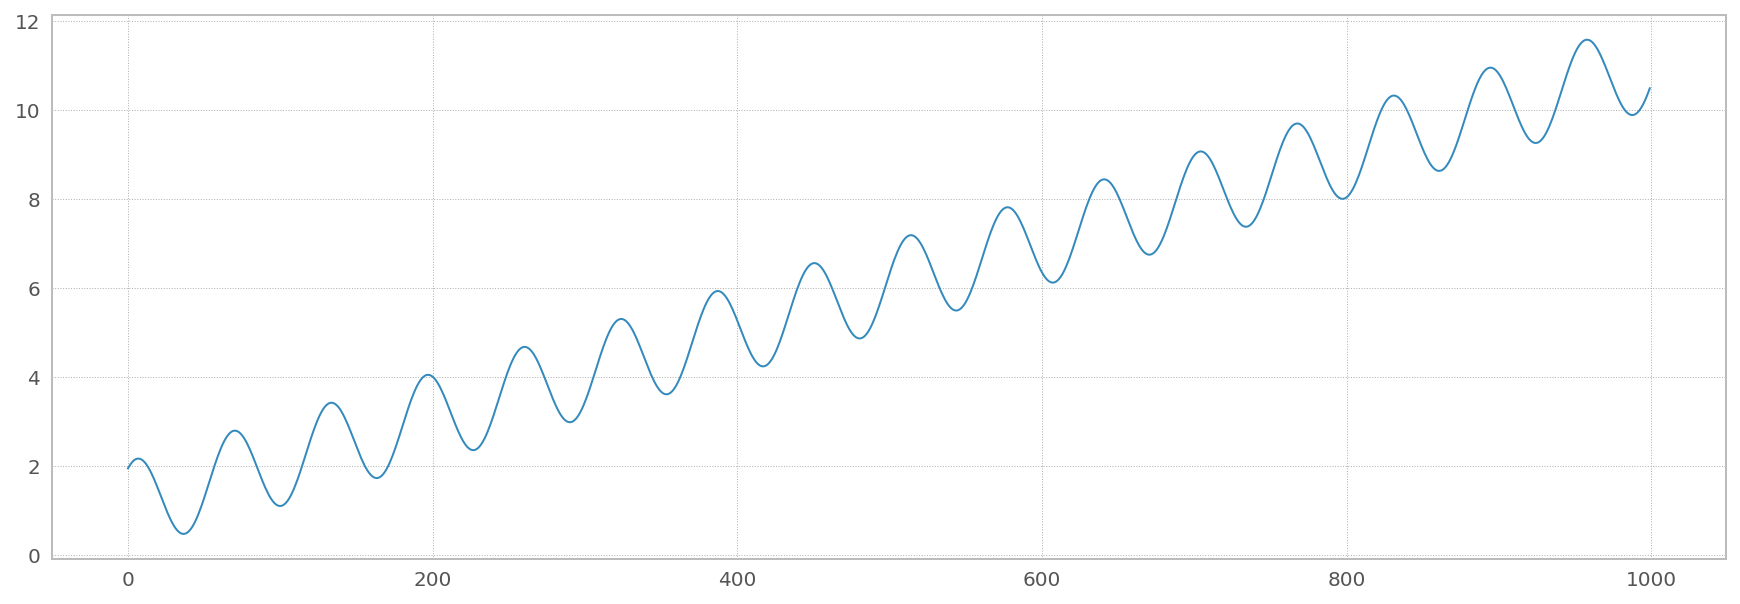

In [5]:
ts = y + 1 + 0.1*x
plt.plot(ts);

In [6]:
adfuller(ts, regression = 'c')

(0.031165082407630326,
 0.9610347741149683,
 5,
 994,
 {'1%': -3.43694584277544,
  '5%': -2.8644520725172873,
  '10%': -2.5683205291305176},
 -61829.12989039489)

In [7]:
adfuller(ts, regression = 'ct')

(-2533047468424.5176,
 0.0,
 2,
 997,
 {'1%': -3.9678790757313824,
  '5%': -3.4149027470782776,
  '10%': -3.1296473513794565},
 -59994.23454374917)

# Comparison

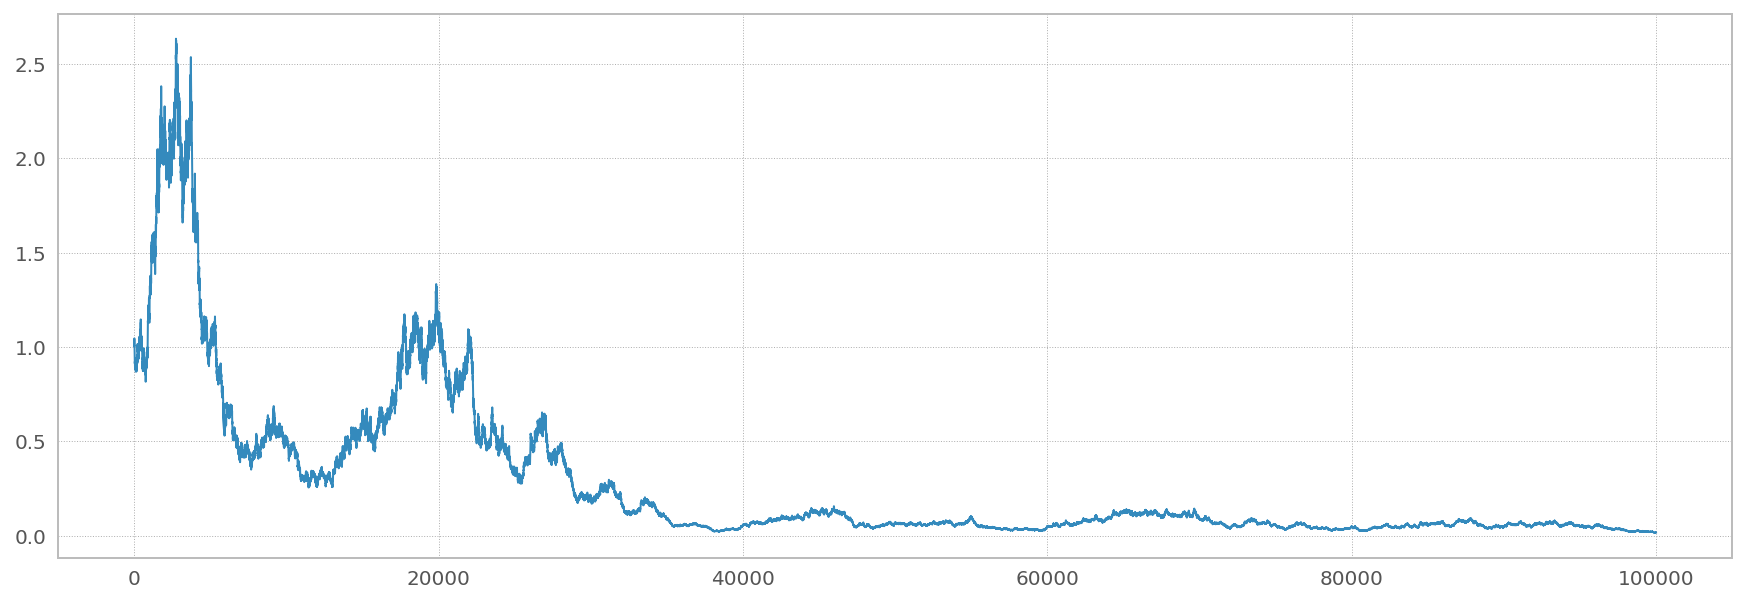

In [31]:
np.random.seed(42)
x = np.random.randn(100000)/100 + 1
p = np.cumprod(x)
plt.plot(p);

## Statsmodels

In [13]:
adfuller(p, regression="ct")

(-2.5502266550380943,
 0.30332205656029343,
 68,
 99931,
 {'1%': -3.958860596356383,
  '5%': -3.4105339352195707,
  '10%': -3.127075874246023},
 -778746.8244699097)

In [17]:
%timeit adfuller(p, regression="ct")

7.02 s ± 17.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Arch

In [20]:
from arch.unitroot import ADF
adf = ADF(p, trend="ct")
adf.summary()

Test Statistic,-2.550
P-value,0.303
Lags,68


In [23]:
%timeit ADF(p, trend="ct").summary()

456 ms ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Log-transform

All the statistical EMH tests should be carried out on log-transformed series !!!

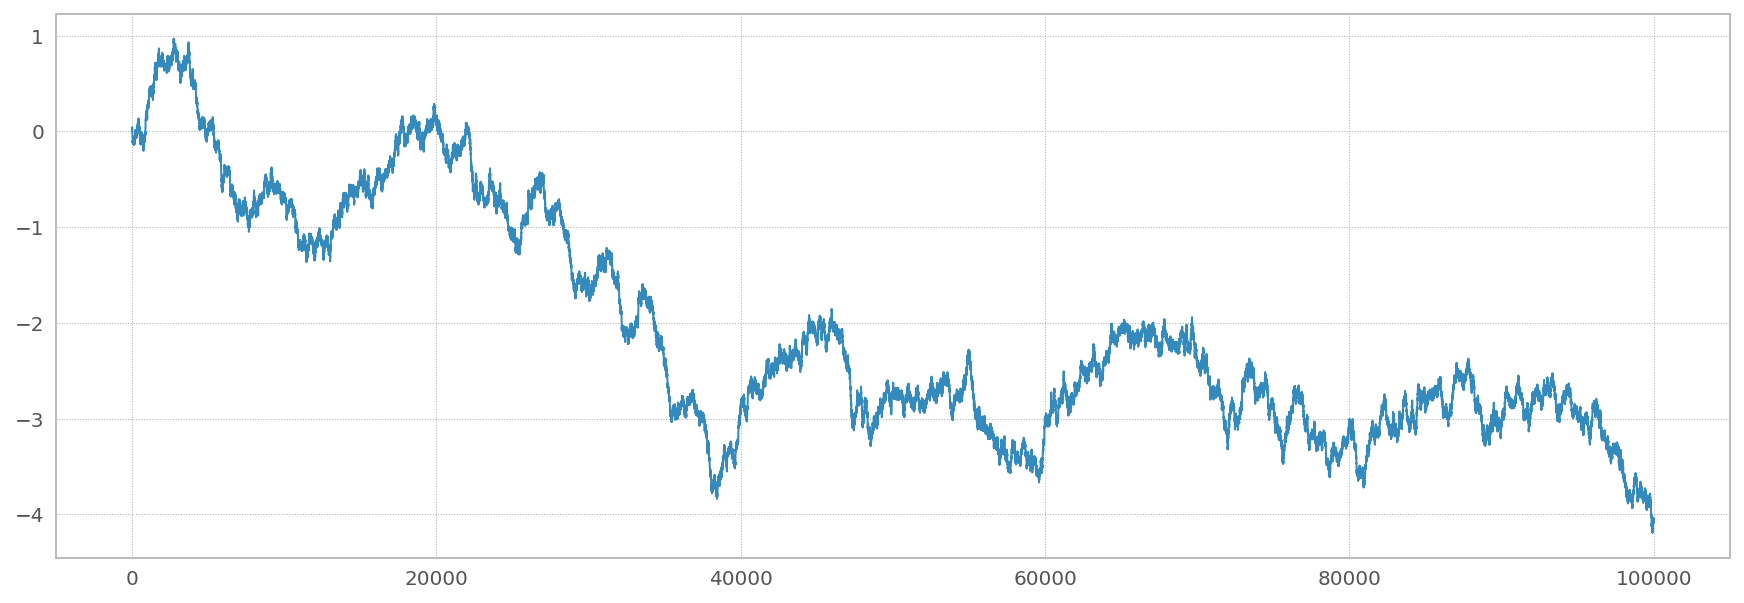

In [33]:
plt.plot(np.log(p));

In [34]:
ADF(np.log(p), trend="ct").summary()

Test Statistic,-2.420
P-value,0.369
Lags,0
